In [1]:
#Importing core libraries
import pandas as pd

#Loading the training dataset
df = pd.read_csv("../data/train.csv")

#Viewing the top rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install matplotlib seaborn

zsh:1: command not found: pip


In [5]:
!pip install matplotlib seaborn


zsh:1: command not found: pip


In [6]:
import sys
!{sys.executable} -m pip install matplotlib seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


/var/folders/8t/v0xt96g10w98qbs2bnl651bm0000gn/T/ipykernel_38193/637333874.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=df, palette='Set2')


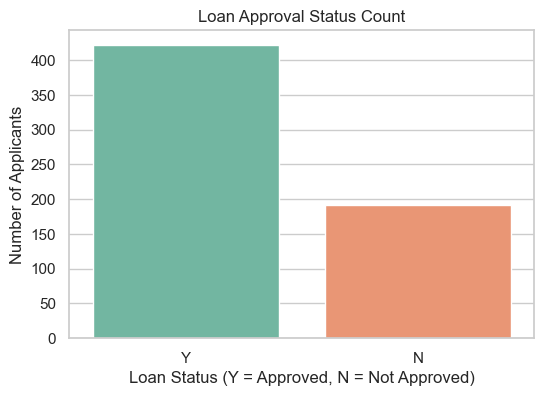

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set default styling
sns.set(style="whitegrid")

# Plot Loan Status distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df, palette='Set2')
plt.title("Loan Approval Status Count")
plt.xlabel("Loan Status (Y = Approved, N = Not Approved)")
plt.ylabel("Number of Applicants")
plt.show()

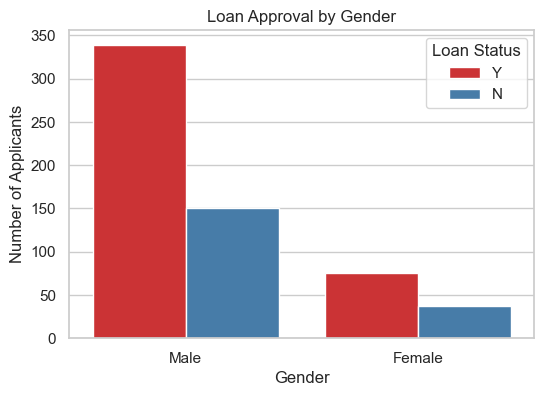

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Loan_Status', palette='Set1')
plt.title("Loan Approval by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Applicants")
plt.legend(title='Loan Status')
plt.show()

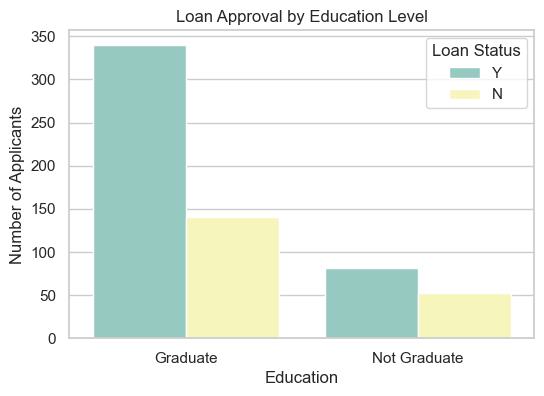

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Education', hue='Loan_Status', palette='Set3')
plt.title("Loan Approval by Education Level")
plt.xlabel("Education")
plt.ylabel("Number of Applicants")
plt.legend(title='Loan Status')
plt.show()

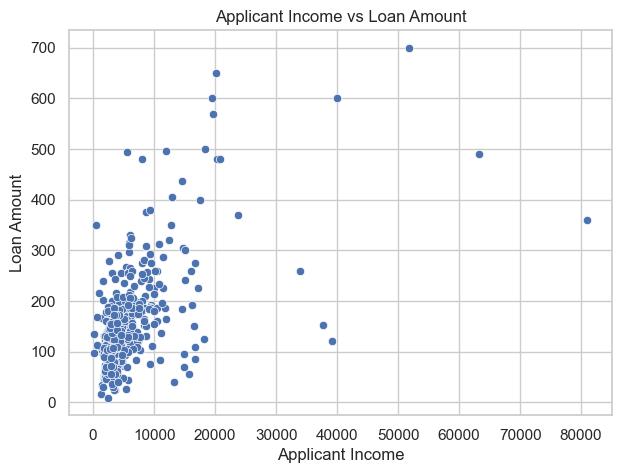

In [10]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)
plt.title("Applicant Income vs Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.grid(True)
plt.show()

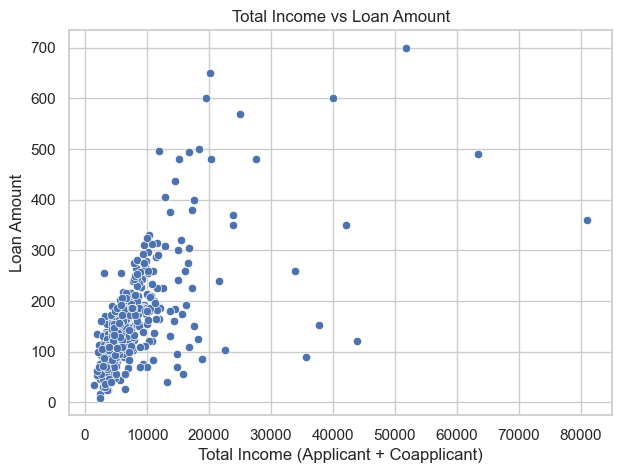

In [11]:
# Create TotalIncome feature
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Plot TotalIncome vs LoanAmount
plt.figure(figsize=(7, 5))
sns.scatterplot(x='TotalIncome', y='LoanAmount', data=df)
plt.title("Total Income vs Loan Amount")
plt.xlabel("Total Income (Applicant + Coapplicant)")
plt.ylabel("Loan Amount")
plt.grid(True)
plt.show()

/var/folders/8t/v0xt96g10w98qbs2bnl651bm0000gn/T/ipykernel_38193/1883213837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='TotalIncome', data=df, palette='Pastel1')


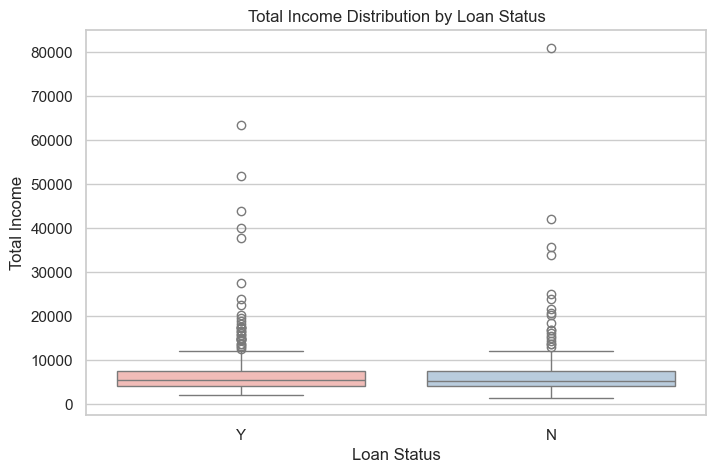

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Loan_Status', y='TotalIncome', data=df, palette='Pastel1')
plt.title("Total Income Distribution by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Total Income")
plt.show()

/var/folders/8t/v0xt96g10w98qbs2bnl651bm0000gn/T/ipykernel_38193/887342713.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='Log_TotalIncome', data=df, palette='coolwarm')


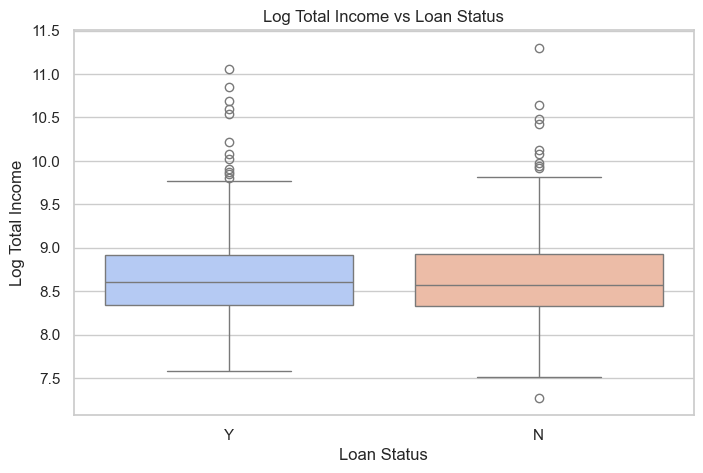

In [13]:
import numpy as np

# Create a log-transformed column for TotalIncome
df['Log_TotalIncome'] = np.log1p(df['TotalIncome'])

# Plot boxplot after log transformation
plt.figure(figsize=(8, 5))
sns.boxplot(x='Loan_Status', y='Log_TotalIncome', data=df, palette='coolwarm')
plt.title("Log Total Income vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Log Total Income")
plt.show()

In [14]:
# Check missing values count in each column
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
TotalIncome           0
Log_TotalIncome       0
dtype: int64

In [15]:
# Fill categorical nulls using mode
for col in ['Gender', 'Married', 'Self_Employed', 'Dependents', 'Loan_Amount_Term', 'Credit_History']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill LoanAmount (numerical) with median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [16]:
# Encode binary categories using map
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})  # Target variable

# Encode 'Dependents' (treat '3+' as 3)
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

# One-hot encode multiclass (Property_Area)
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

In [17]:
!{sys.executable} -m pip install scikit-learn



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


In [18]:
from sklearn.model_selection import train_test_split

# Split features and target
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = df['Loan_Status']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (491, 14)
Testing data shape: (123, 14)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy Score: 0.7886178861788617

📊 Confusion Matrix:
 [[18 25]
 [ 1 79]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("🌲 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_tree))

🌲 Decision Tree Accuracy: 0.7723577235772358

📊 Confusion Matrix:
 [[19 24]
 [ 4 76]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.44      0.58        43
           1       0.76      0.95      0.84        80

    accuracy                           0.77       123
   macro avg       0.79      0.70      0.71       123
weighted avg       0.78      0.77      0.75       123



In [21]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

y_pred_forest = forest_model.predict(X_test)

print("🌲 Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_forest))

🌲 Random Forest Accuracy: 0.7967479674796748

📊 Confusion Matrix:
 [[20 23]
 [ 2 78]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.77      0.97      0.86        80

    accuracy                           0.80       123
   macro avg       0.84      0.72      0.74       123
weighted avg       0.82      0.80      0.78       123



In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split again
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Retrain LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train_s, y_train_s)
y_pred_s = model.predict(X_test_s)

In [23]:
# Evaluate the scaled model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("📊 Scaled Logistic Regression Accuracy:", accuracy_score(y_test_s, y_pred_s))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test_s, y_pred_s))
print("\n📋 Classification Report:\n", classification_report(y_test_s, y_pred_s))

📊 Scaled Logistic Regression Accuracy: 0.7804878048780488

🧮 Confusion Matrix:
 [[18 25]
 [ 2 78]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [24]:
!pip install xgboost

zsh:1: command not found: pip


In [25]:
import sys
!{sys.executable} -m pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


In [26]:
from xgboost import XGBClassifier

In [27]:
ls /opt/homebrew/opt/libomp/lib/libomp.dylib

/opt/homebrew/opt/libomp/lib/libomp.dylib


In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("🎯 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_xgb))

🎯 XGBoost Accuracy: 0.7479674796747967

📊 Confusion Matrix:
 [[21 22]
 [ 9 71]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.49      0.58        43
           1       0.76      0.89      0.82        80

    accuracy                           0.75       123
   macro avg       0.73      0.69      0.70       123
weighted avg       0.74      0.75      0.73       123



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:32:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [29]:
import joblib

# Save the best performing model
joblib.dump(forest_model, "loan_model_rf.pkl")

['loan_model_rf.pkl']

In [30]:
loaded_model = joblib.load("loan_model_rf.pkl")
print(loaded_model.predict(X_test[:1]))

[1]


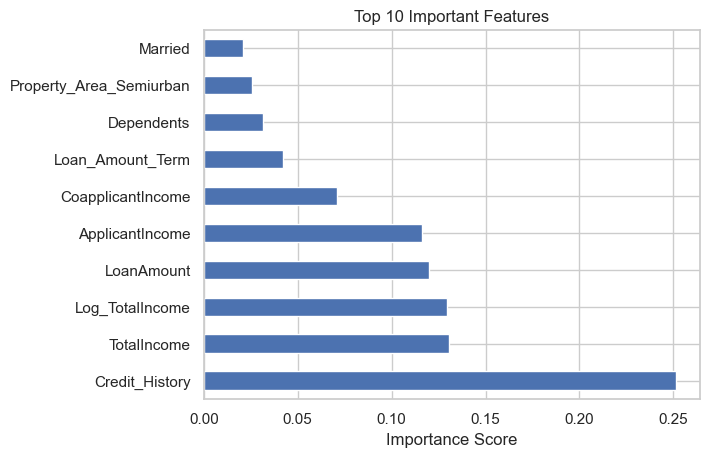

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

importances = pd.Series(forest_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.show()

In [32]:
import joblib
joblib.dump(xgb_model, "../model/xgb_model.pkl")

['../model/xgb_model.pkl']

In [33]:
print(X_train.columns.tolist())

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome', 'Log_TotalIncome', 'Property_Area_Semiurban', 'Property_Area_Urban']
